# Exploitation graphique SIRAC Strasbourg
### Luka Fegyveres

In [2]:
import os
import sqlite3
import numpy    as np
import datetime
import time
import pandas   as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:

dir = os.chdir('C:\\Users\\lukaf\\OneDrive - Ecole Polytechnique\\Bureau\\Polytechnique\\4A\\Ponts\\VET\\S1\\MCNDU\\Projet Strasbourg')


In [7]:
SIRAC = pd.read_csv('DATA\\api_sirac_maj_2025_12_17.csv', sep=';',encoding='latin-1')


In [8]:
SIRAC

,Unnamed: 0,ident,name,etat,debit,taux,debitlisse,tauxlisse,vitessebrp,ts,etatexp,dmajetatexp,time,latitude,longitude
0,0,1,Schirmeck1 - Entree Ville,1,0,-1,0,-1,0.000000,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 20:35:16,48.562080,7.698018
1,1,2,Schirmeck2 - Sortie Ville,2,0,-1,0,-1,0.000000,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 20:35:16,48.562225,7.697830
2,2,3,Schirmeck3 - Entree Ville,1,13,1,214,0,36.373814,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 20:35:16,48.563495,7.703633
3,3,4,Schirmeck4 - Sortie Ville,1,10,2,230,2,25.252525,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 20:35:16,48.563632,7.703529
4,4,5,Schirmeck5 - Entree Ville,1,21,8,342,5,17.700607,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 20:35:16,48.566286,7.708155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742891,517771,1321,RP dÃ©cathlon - C1091,2,0,-1,0,-1,0.000000,2025-12-17T12:33:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 13:06:37,48.523962,7.690701
742892,517772,1322,RP RM84 - C1091,2,0,-1,0,-1,0.000000,2025-12-17T12:33:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 13:06:37,48.521668,7.693462
742893,517773,1323,C1091 - RP RM84,2,0,-1,0,-1,0.000000,2025-12-17T12:33:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 13:06:37,48.521554,7.693270
742894,517774,1324,C1012 - RM484,1,0,-1,0,-1,0.000000,2025-12-17T12:33:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 13:06:37,48.530763,7.688053


In [9]:

#Voir les noms de colonnes : 
SIRAC.info()#list(SIRAC)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562800 entries, 0 to 562799
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   562800 non-null  int64  
 1   ident        562800 non-null  int64  
 2   name         562800 non-null  object 
 3   etat         562800 non-null  int64  
 4   debit        562800 non-null  int64  
 5   taux         562800 non-null  int64  
 6   debitlisse   562800 non-null  int64  
 7   tauxlisse    562800 non-null  int64  
 8   vitessebrp   562800 non-null  float64
 9   ts           562800 non-null  object 
 10  etatexp      562800 non-null  int64  
 11  dmajetatexp  562800 non-null  object 
 12  time         562800 non-null  object 
 13  latitude     562800 non-null  float64
 14  longitude    562800 non-null  float64
dtypes: float64(3), int64(8), object(4)
memory usage: 64.4+ MB


## Analyse de la circulation par tronçon 

In [61]:
SIRAC_tronçon = SIRAC[SIRAC.ident==109]
SIRAC_tronçon

,Unnamed: 0,ident,name,etat,debit,taux,debitlisse,tauxlisse,vitessebrp,ts,etatexp,dmajetatexp,time,latitude,longitude
35,35,109,Rue du Fbg de Pierre->NuÃ©e Bleue,1,2,1,42,1,40.322582,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 20:35:16,48.588734,7.745474
504,504,109,Rue du Fbg de Pierre->NuÃ©e Bleue,1,2,1,42,1,40.322582,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 21:05:17,48.588734,7.745474
973,973,109,Rue du Fbg de Pierre->NuÃ©e Bleue,1,2,1,42,1,40.322582,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 21:35:17,48.588734,7.745474
1442,1442,109,Rue du Fbg de Pierre->NuÃ©e Bleue,1,2,1,42,1,40.322582,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 22:05:18,48.588734,7.745474
1911,1911,109,Rue du Fbg de Pierre->NuÃ©e Bleue,1,2,1,42,1,40.322582,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 22:35:19,48.588734,7.745474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740586,515466,109,Rue du Fbg de Pierre->NuÃ©e Bleue,1,7,2,154,3,44.529263,2025-12-17T10:33:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 11:06:24,48.588734,7.745474
741055,515935,109,Rue du Fbg de Pierre->NuÃ©e Bleue,1,4,1,136,2,44.843050,2025-12-17T11:03:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 11:36:26,48.588734,7.745474
741524,516404,109,Rue du Fbg de Pierre->NuÃ©e Bleue,1,9,3,228,4,43.988270,2025-12-17T10:03:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 12:06:34,48.588734,7.745474
741993,516873,109,Rue du Fbg de Pierre->NuÃ©e Bleue,1,5,2,138,2,42.372880,2025-12-17T12:03:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 12:36:35,48.588734,7.745474


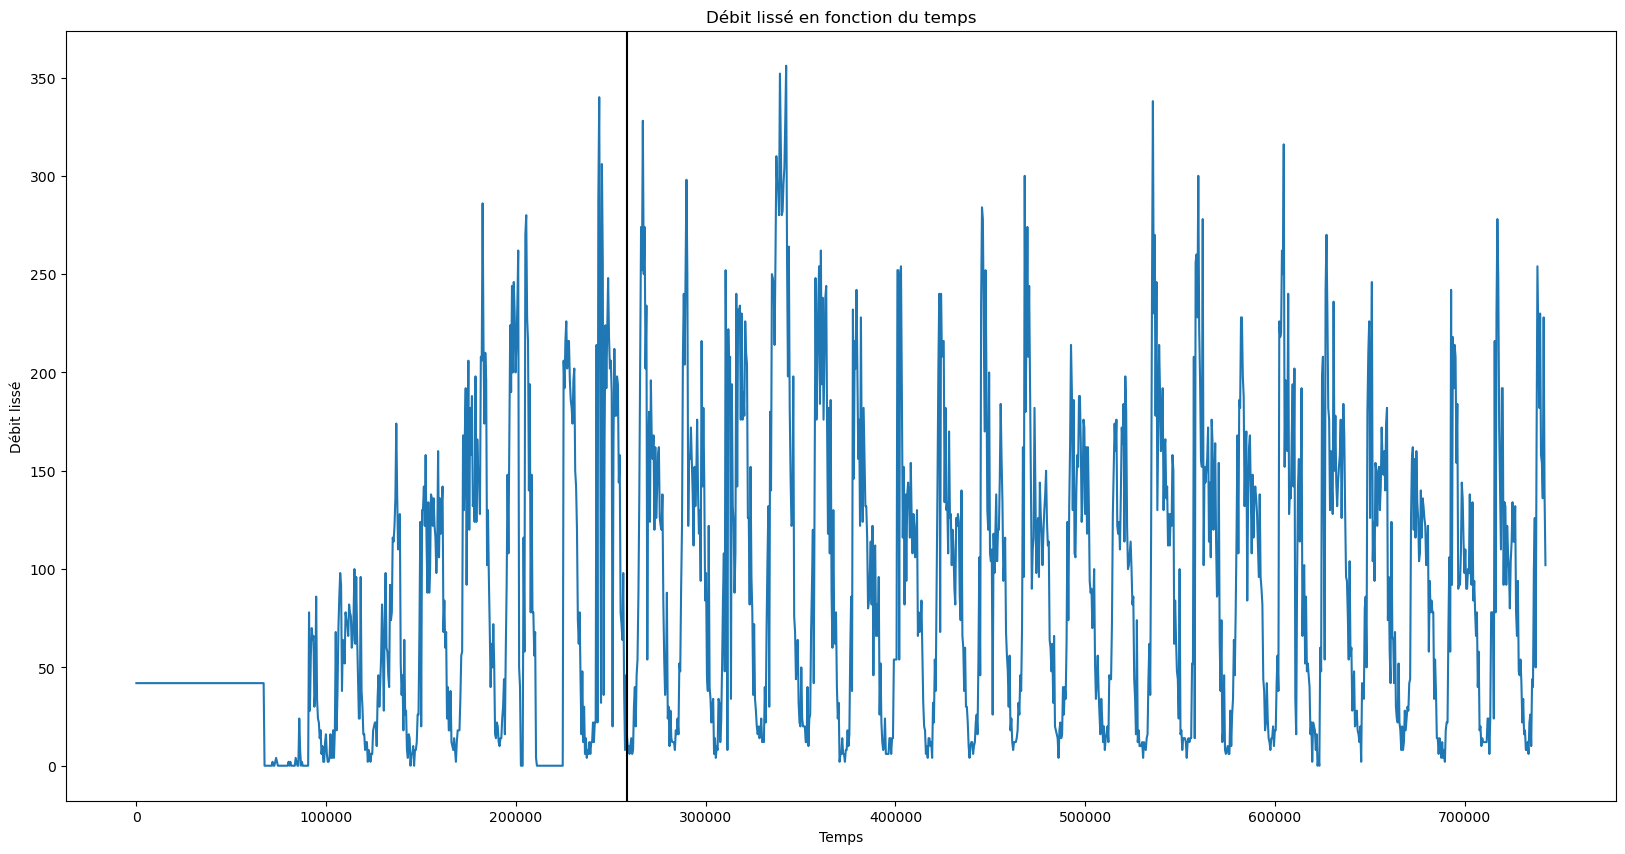

In [65]:
plt.figure(figsize=(20,10))
plt.plot(SIRAC_tronçon['debitlisse'])
plt.xlabel("Temps")
plt.ylabel("Débit lissé")
plt.title("Débit lissé en fonction du temps")
plt.axvline(x=258456,color='black') #Ajout d'une ligne verticale
plt.show()

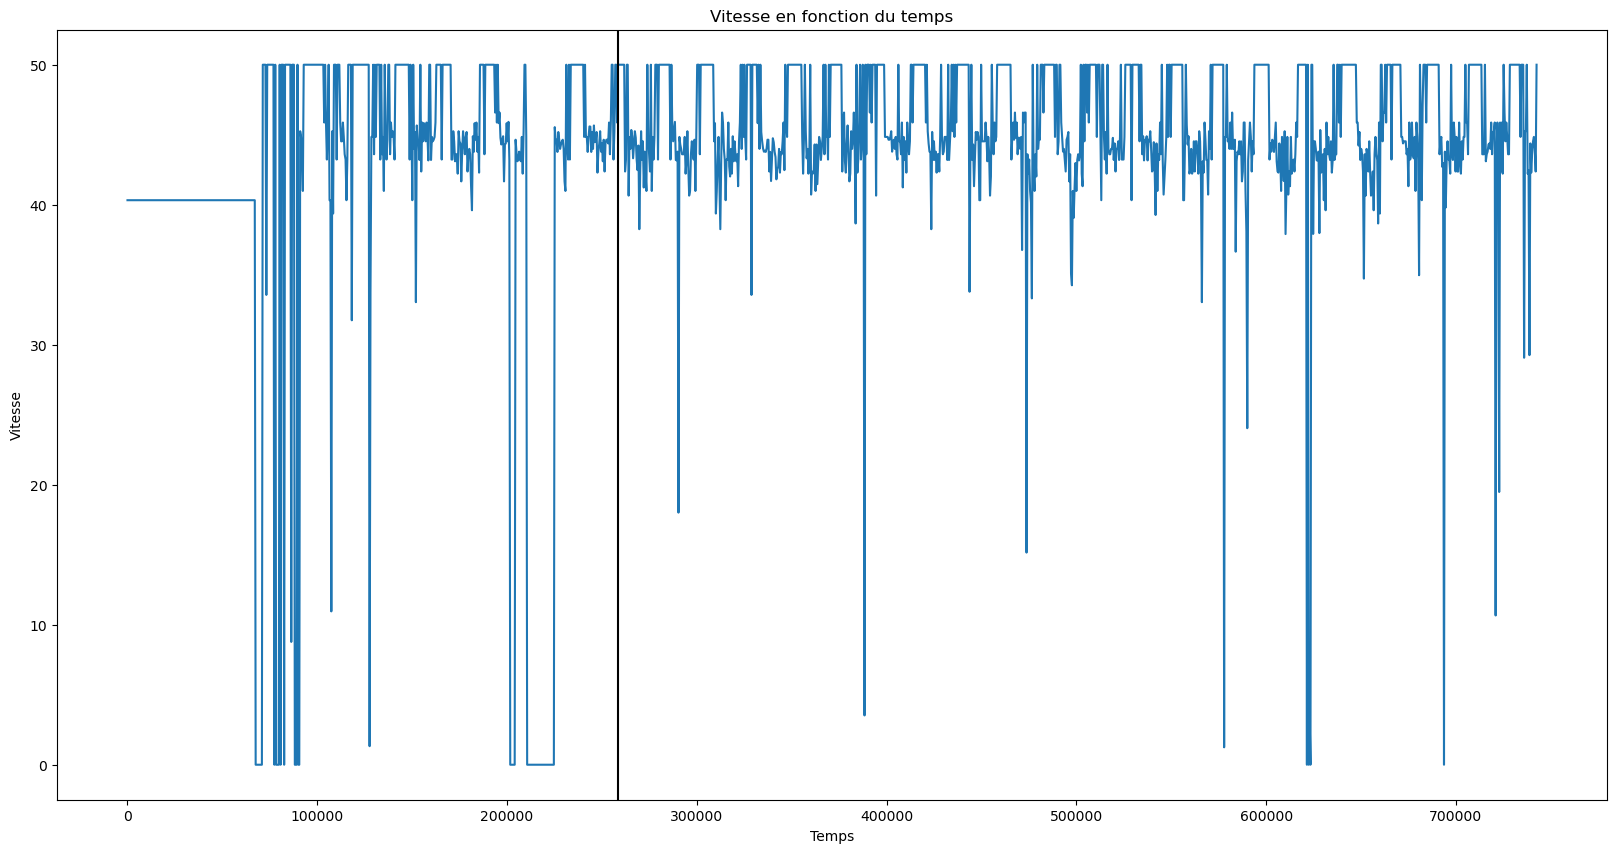

In [66]:
plt.figure(figsize=(20,10))
plt.plot(SIRAC_tronçon['vitessebrp'])
plt.xlabel("Temps")
plt.ylabel("Vitesse")
plt.title("Vitesse en fonction du temps")
plt.axvline(x=258456,color='black') #Ajout d'une ligne verticale
plt.show()

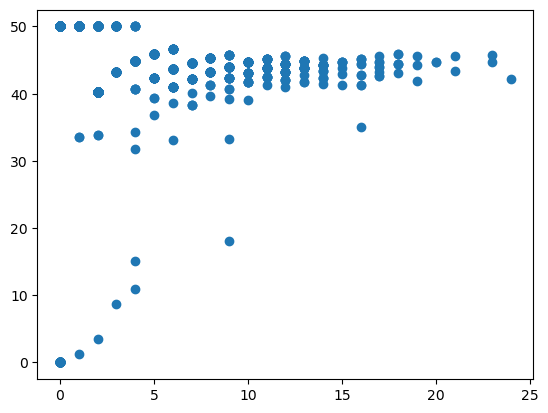

In [52]:
plt.scatter(SIRAC_tronçon['debit'], SIRAC_tronçon['vitessebrp'])

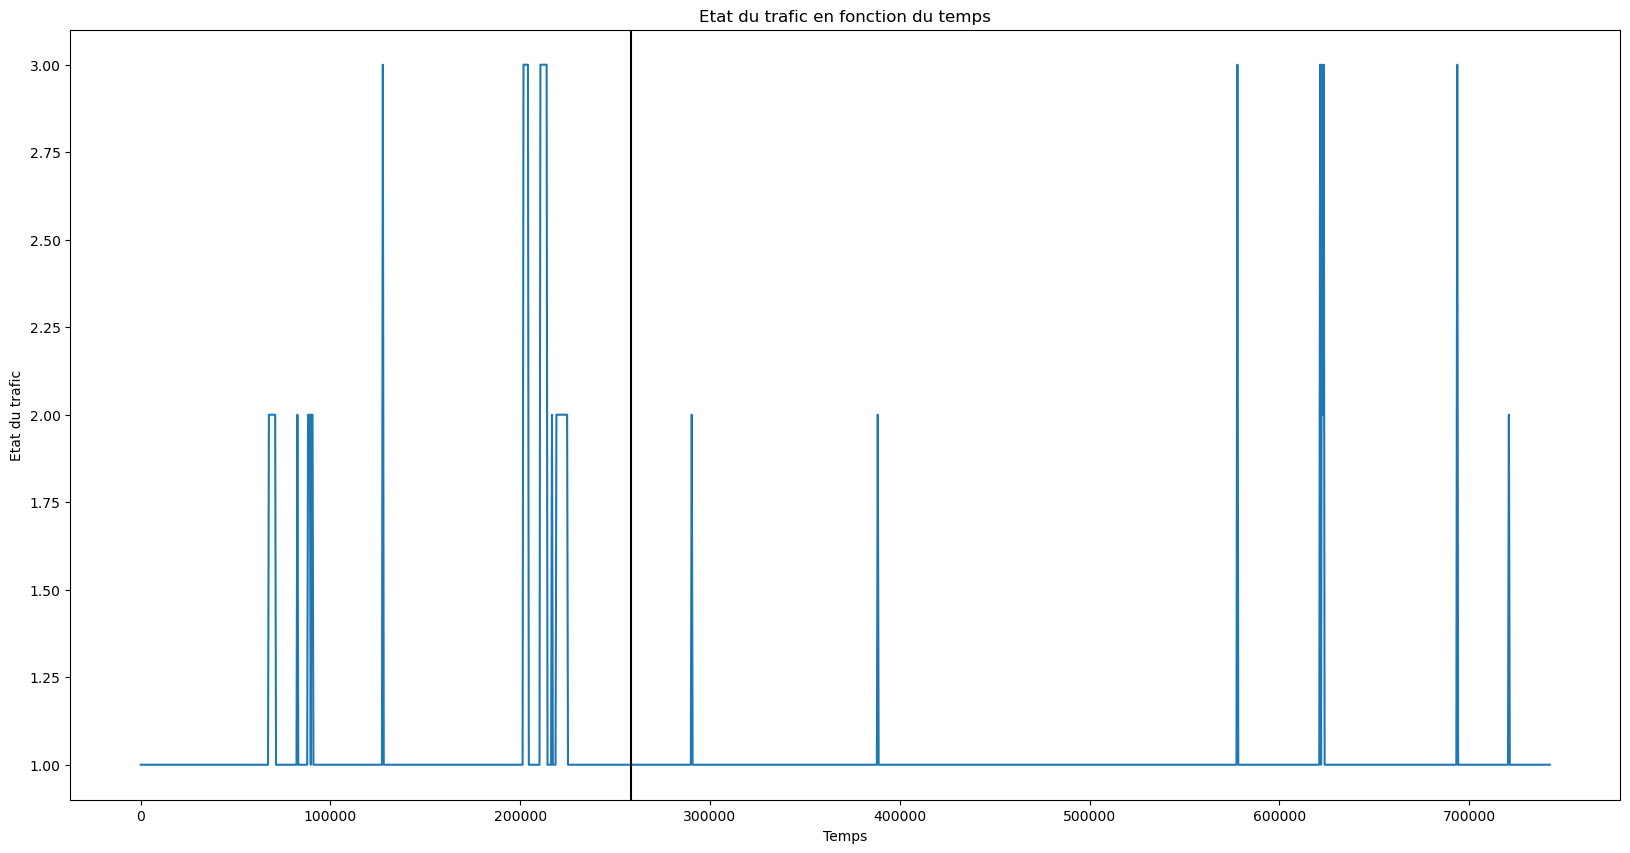

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(SIRAC_tronçon['etat'])
plt.xlabel("Temps")
plt.ylabel("Etat du trafic")
plt.title("Etat du trafic en fonction du temps")
plt.axvline(x=258456,color='black') #Ajout d'une ligne verticale
plt.show()

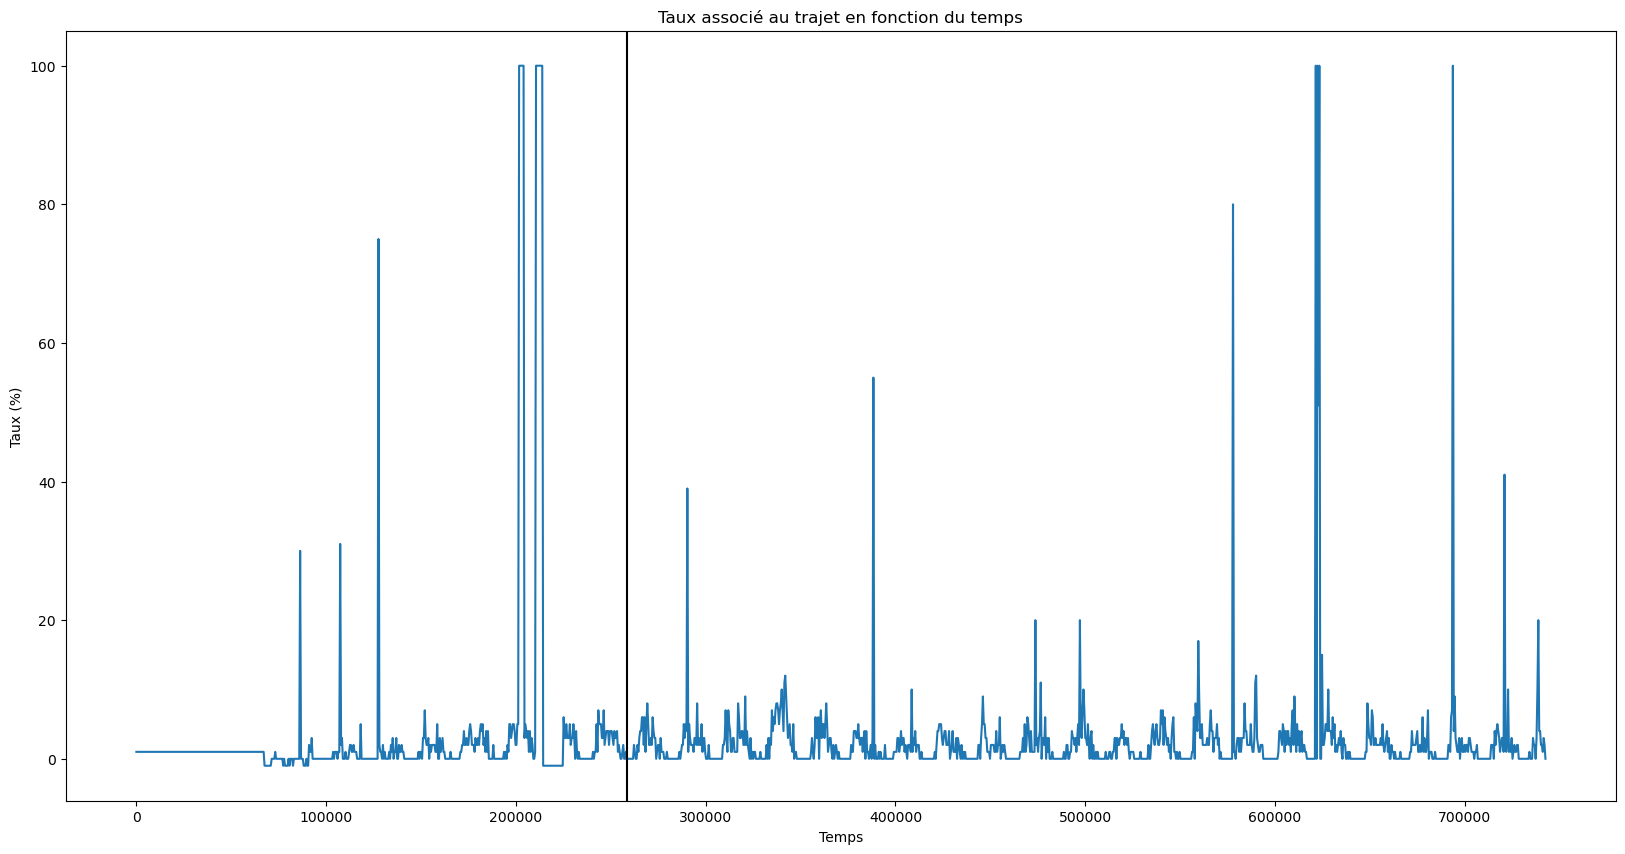

In [69]:
plt.figure(figsize=(20,10))
plt.plot(SIRAC_tronçon['taux'])
plt.xlabel("Temps")
plt.ylabel("Taux (%)")
plt.title("Taux associé au trajet en fonction du temps")
plt.axvline(x=258456,color='black') #Ajout d'une ligne verticale
plt.show()

## Analyse de la circulation par zone

In [3]:
coordonnees_sirac = pd.read_csv("coordinates_sirac.csv", sep = ";")

In [4]:
coordonnees_sirac

,Unnamed: 0,name,lat,lon,zone
0,0,Schirmeck1 - Entree Ville,48.562080,7.698018,3
1,1,Schirmeck2 - Sortie Ville,48.562225,7.697830,3
2,2,Schirmeck3 - Entree Ville,48.563495,7.703633,3
3,3,Schirmeck4 - Sortie Ville,48.563632,7.703529,3
4,4,Schirmeck5 - Entree Ville,48.566286,7.708155,3
...,...,...,...,...,...
464,464,RP décathlon - C1091,48.523962,7.690701,3
465,465,RP RM84 - C1091,48.521668,7.693462,3
466,466,C1091 - RP RM84,48.521554,7.693270,3
467,467,C1012 - RM484,48.530763,7.688053,3


In [9]:
SIRAC_avec_zone = pd.merge(SIRAC, coordonnees_sirac[['name','zone']], on='name')

In [10]:
SIRAC_avec_zone

,Unnamed: 0,ident,name,etat,debit,taux,debitlisse,tauxlisse,vitessebrp,ts,etatexp,dmajetatexp,time,latitude,longitude,zone
0,0,1,Schirmeck1 - Entree Ville,1,0,-1,0,-1,0.0,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 20:35:16,48.56208,7.698018,3
1,469,1,Schirmeck1 - Entree Ville,1,0,-1,0,-1,0.0,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 21:05:17,48.56208,7.698018,3
2,938,1,Schirmeck1 - Entree Ville,1,0,-1,0,-1,0.0,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 21:35:17,48.56208,7.698018,3
3,1407,1,Schirmeck1 - Entree Ville,1,0,-1,0,-1,0.0,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 22:05:18,48.56208,7.698018,3
4,1876,1,Schirmeck1 - Entree Ville,1,0,-1,0,-1,0.0,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 22:35:19,48.56208,7.698018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617755,515899,1325,RM484 - C1012,3,0,-1,0,-1,0.0,2025-12-17T10:33:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 11:06:24,48.53052,7.688116,3
617756,516368,1325,RM484 - C1012,2,0,-1,0,-1,0.0,2025-12-17T10:03:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 11:36:26,48.53052,7.688116,3
617757,516837,1325,RM484 - C1012,1,0,-1,0,-1,0.0,2025-12-17T11:33:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 12:06:34,48.53052,7.688116,3
617758,517306,1325,RM484 - C1012,1,0,-1,0,-1,0.0,2025-12-17T12:03:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 12:36:35,48.53052,7.688116,3


In [14]:
SIRAC_zone_1 = SIRAC_avec_zone[SIRAC_avec_zone["zone"] == 1]
SIRAC_zone_2 = SIRAC_avec_zone[SIRAC_avec_zone["zone"] == 2]
SIRAC_zone_3 = SIRAC_avec_zone[SIRAC_avec_zone["zone"] == 3]

In [25]:
SIRAC_zone_1

,Unnamed: 0,ident,name,etat,debit,taux,debitlisse,tauxlisse,vitessebrp,ts,etatexp,dmajetatexp,time,latitude,longitude,zone
45936,29,100,Tanneurs,1,1,0,76,2,40.000000,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 20:35:16,48.583282,7.744032,1
45937,498,100,Tanneurs,1,1,0,76,2,40.000000,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 21:05:17,48.583282,7.744032,1
45938,967,100,Tanneurs,1,1,0,76,2,40.000000,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 21:35:17,48.583282,7.744032,1
45939,1436,100,Tanneurs,1,1,0,76,2,40.000000,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 22:05:18,48.583282,7.744032,1
45940,1905,100,Tanneurs,1,1,0,76,2,40.000000,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 22:35:19,48.583282,7.744032,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430843,515766,850,Wilson 884-881,1,25,4,410,3,25.000000,2025-12-17T10:33:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 11:06:24,48.589201,7.740189,1
430844,516235,850,Wilson 884-881,1,20,3,490,4,25.477707,2025-12-17T11:03:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 11:36:26,48.589201,7.740189,1
430845,516704,850,Wilson 884-881,1,24,3,420,3,27.210886,2025-12-17T09:30:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 12:06:34,48.589201,7.740189,1
430846,517173,850,Wilson 884-881,1,21,3,440,3,25.949951,2025-12-17T12:03:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 12:36:35,48.589201,7.740189,1


In [28]:
SIRAC_zone_1_moyenne = SIRAC_zone_1[['debitlisse','ts']].groupby(['ts']).mean()
SIRAC_zone_2_moyenne = SIRAC_zone_2[['debitlisse','ts']].groupby(['ts']).mean()
SIRAC_zone_3_moyenne = SIRAC_zone_3[['debitlisse','ts']].groupby(['ts']).mean()

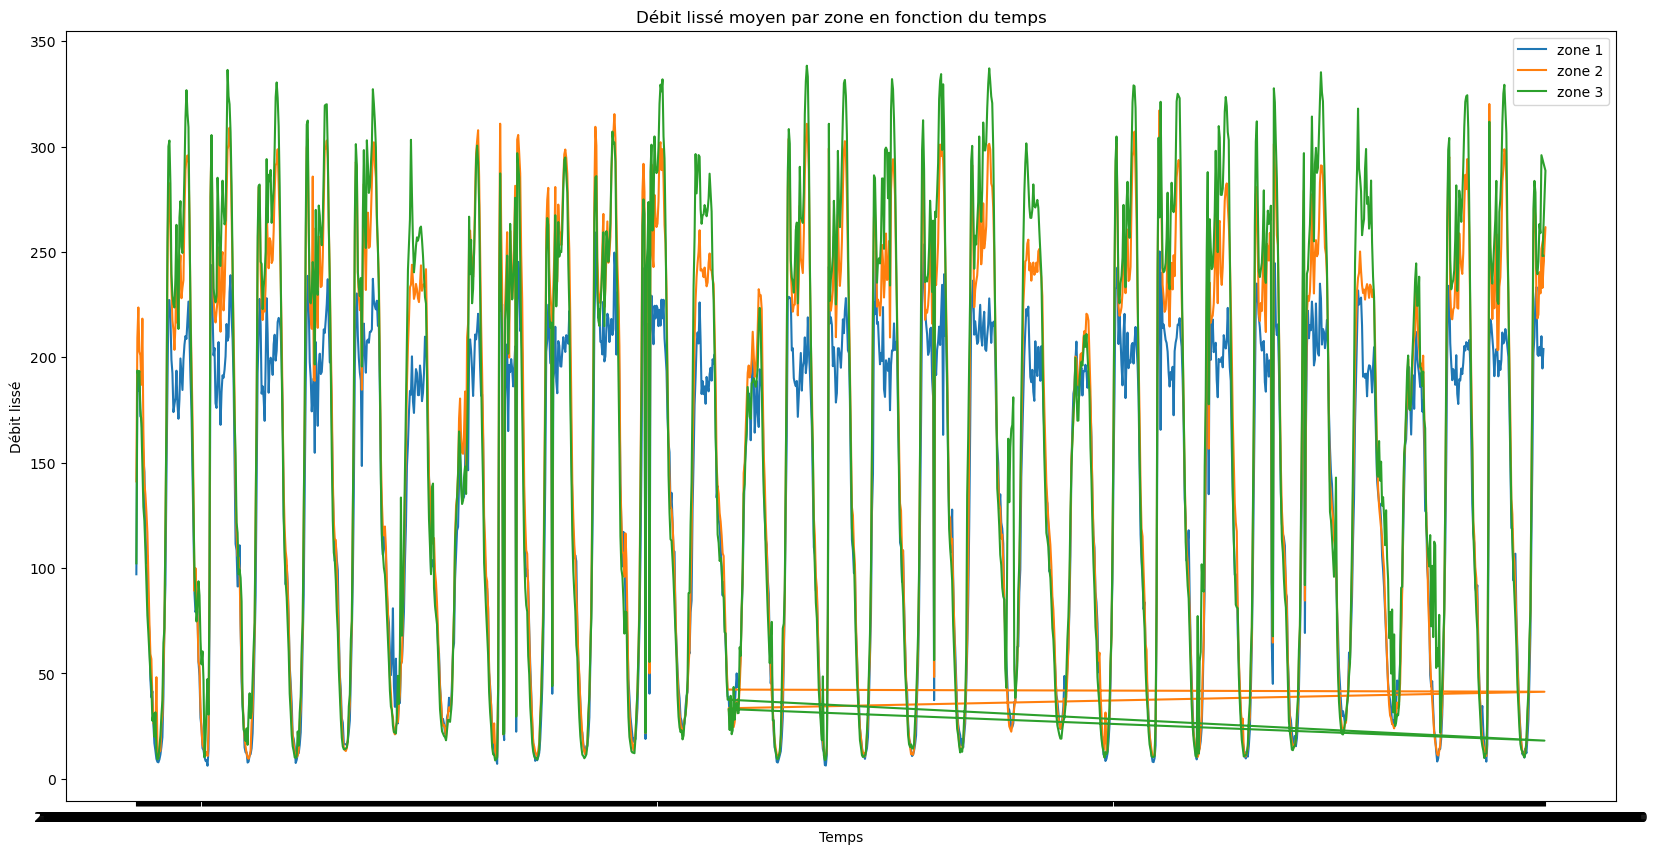

In [31]:
plt.figure(figsize=(20,10))
plt.plot(SIRAC_zone_1_moyenne['debitlisse'], label = 'zone 1')
plt.plot(SIRAC_zone_2_moyenne['debitlisse'], label = 'zone 2')
plt.plot(SIRAC_zone_3_moyenne['debitlisse'], label = 'zone 3')
plt.xlabel("Temps")
plt.ylabel("Débit lissé")
plt.title("Débit lissé moyen par zone en fonction du temps")
#plt.axvline(x=258456,color='black') #Ajout d'une ligne verticale
plt.legend()
plt.show()